# Next 3 minutes (approx.) of your presentation -- Set The Stage
Present your Exploratory Data Analysis and some initial data-driven Insights from the dataset.
You MAY also mention how you are planning to set up the Analysis / ML problem for this case.
You MUST mention how you collected / curated / cleaned / prepared the data for this problem.
Did you only use tools and techniques learned in this course? What ELSE did you learn / try?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Type Conversion for numeric variables (object to numeric)

In [2]:
listings = pd.read_csv('datasets/listings_with_nlp.csv')

listings['price'] = listings['price'].str.replace('[\$,]', '', regex=True).astype(float)

# convert host_response_rate to float and replace "N/A" values with mean
col_float = pd.to_numeric(listings['host_response_rate'].str.replace('%', ''), errors='coerce')
mean = col_float.mean()
col_float.fillna(mean, inplace=True)
listings['host_response_rate'] = col_float

# convert host_acceptance_rate to float and replace "N/A" values with mean
col_float = pd.to_numeric(listings['host_acceptance_rate'].str.replace('%', ''), errors='coerce')
mean = col_float.mean()
col_float.fillna(mean, inplace=True)
listings['host_acceptance_rate'] = col_float

# apply the function to the 'amenities' column and add a new column to the DataFrame
def get_amenities_count(amenities_list):
    return len(amenities_list.split(','))
listings['amenities_count'] = listings['amenities'].apply(get_amenities_count)

In [13]:
# for col in listings.columns:
#     print(f"{col}: {listings[col].dtype}")

## Corr Matrix

43


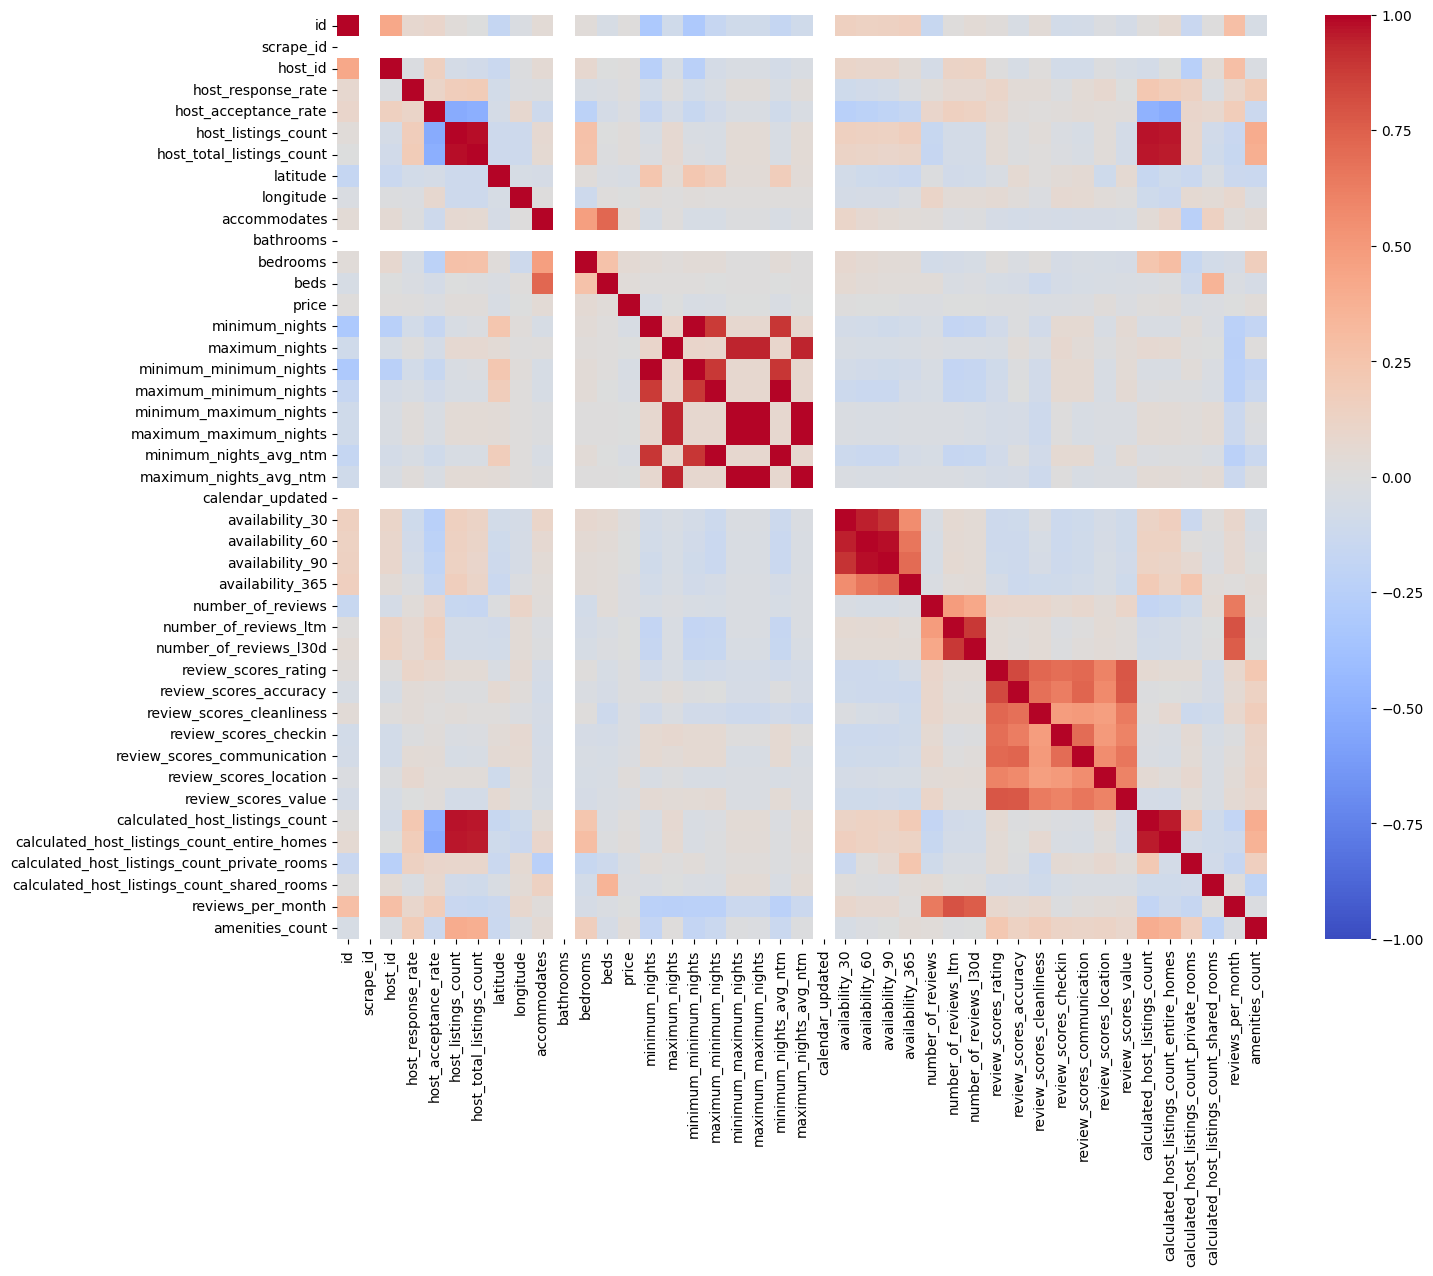

In [3]:
numeric_cols = listings.select_dtypes(include=['float64', 'int64']).columns
print(len(numeric_cols))
corr_matrix = listings[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=False, cmap='coolwarm', xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values)
plt.show()

## Type conversion for categorical variables (categorical to one-hot encoding)

In [4]:
# List of categorical features to be one-hot encoded
categorical_features = ['host_response_time', 'host_is_superhost', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 
                        'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 
                        'has_availability', 'instant_bookable']

# Perform one-hot encoding on categorical features
listings = pd.get_dummies(listings, columns=categorical_features, drop_first=True)

In [6]:
listings.to_csv('datasets/listings_preprocessed.csv', index=False)

In [ ]:
# Find the variable with the highest correlation
highest_corr_variable = corr_matrix.idxmax().idxmax()

# Display the result
print("The variable with the highest correlation is:", highest_corr_variable)